# **Uber Ride Analysis**
# ****IN-PROGRESS****
### **Author:** Jaden Esteves
#### **Dataset** - Uber Ride Analytics Dataset 2024

# **1. Introduction**

Important questions I have for this data set...
- Does the time of day affect how much the booking value?
- Does the day of the week affect booking value?
- What are the most active days of the week for bookings?
- Do longer vehicle arrival times lead to worse customer ratings?
- What months are the most active in terms of bookings?
- What are the most popular forms of transportation?
- What are the most popular forms of payment?

# **2. Data Loading**
    


In [2]:
# Import for data analysis
import pandas as pd            # Data analysis and manipulation
import numpy as np             # Numerical operations
import matplotlib.pyplot as plt # Plotting graphs
import seaborn as sns          # Statistical data visualization

# Loading the dataset
df = pd.read_csv('../data/ncr_ride_bookings.csv')
display(df.head())
df.info()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

# **3. Data Cleaning**
I mainly want to focus on finished rides and reducing outliers to analyze.

In [3]:
# Let's look for duplicates in the dataset and remove them.
df.drop_duplicates(inplace=True)

# Removing unwanted booking statuses (We only want finished rides)
df = df[df['Booking Status'].str.lower() == 'completed']

# Removing the flag columns of the dataset
df.drop(columns=['Cancelled Rides by Driver', 'Cancelled Rides by Customer', 'Incomplete Rides', 'Reason for cancelling by Customer','Driver Cancellation Reason', 'Incomplete Rides Reason'], inplace=True)

# Fixing data types
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')
df['Booking Value'] = df['Booking Value'].astype(float)

# Removing outliers using the IQR method on the Booking Value
Q1 = df['Booking Value'].quantile(0.25)
Q3 = df['Booking Value'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Booking Value'] >= (Q1 - 1.5 * IQR)) & (df['Booking Value'] <= (Q3 + 1.5 * IQR))]

# Displaying the cleaned DataFrame
display(df.head())
df.describe()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,DateTime
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,627.0,13.58,4.9,4.9,Debit Card,2024-08-23 08:56:10
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,416.0,34.02,4.6,5.0,UPI,2024-10-21 17:17:25
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,737.0,48.21,4.1,4.3,UPI,2024-09-16 22:08:00
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,316.0,4.85,4.1,4.6,UPI,2024-02-06 09:44:56
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,640.0,41.24,4.0,4.1,UPI,2024-06-17 15:45:58


,Avg VTAT,Avg CTAT,Booking Value,Ride Distance,Driver Ratings,Customer Rating,DateTime
count,89873.000000,89873.000000,89873.000000,89873.000000,89873.000000,89873.000000,89873
mean,8.511312,30.034214,461.203053,25.992546,4.230997,4.404131,2024-07-01 05:46:47.085587456
min,2.000000,15.000000,50.000000,2.000000,3.000000,3.000000,2024-01-01 00:19:34
25%,5.300000,22.600000,228.000000,14.090000,4.100000,4.200000,2024-03-31 21:46:39
50%,8.500000,30.000000,402.000000,26.020000,4.300000,4.500000,2024-06-30 20:46:10
75%,11.800000,37.500000,650.000000,37.930000,4.600000,4.800000,2024-09-30 17:46:42
max,15.000000,45.000000,1371.000000,50.000000,5.000000,5.000000,2024-12-30 23:21:12
std,3.748856,8.653873,292.936766,13.822143,0.437017,0.438151,NaN


# **4. Exploratory Data Analysis**


### Does the time of day affect how much the booking value?

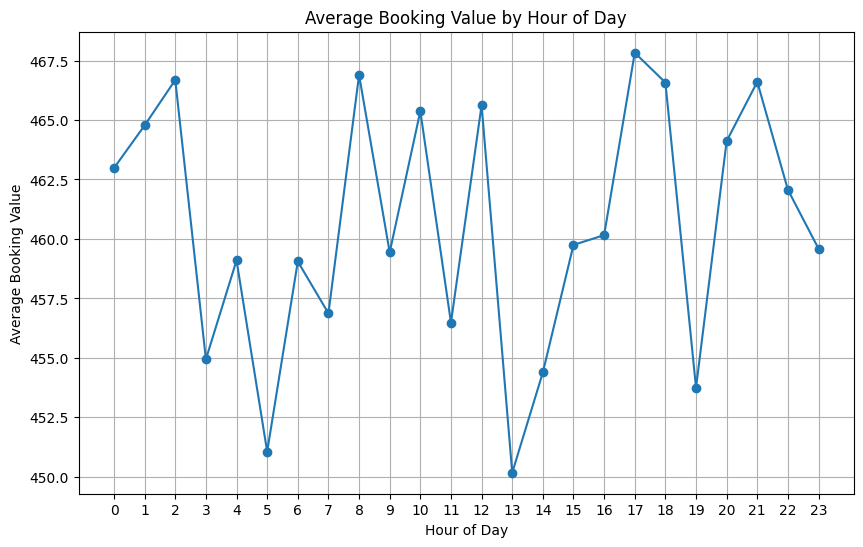

In [4]:
# Extract hour from DateTime
df['Hour'] = df['DateTime'].dt.hour

# Group by hour and calculate mean booking value
hourly_booking_value = df.groupby('Hour')['Booking Value'].mean()

# Plot
plt.figure(figsize=(10,6))
plt.plot(hourly_booking_value.index, hourly_booking_value.values, marker='o')
plt.title('Average Booking Value by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Booking Value')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

### Does the day of the week affect booking value?

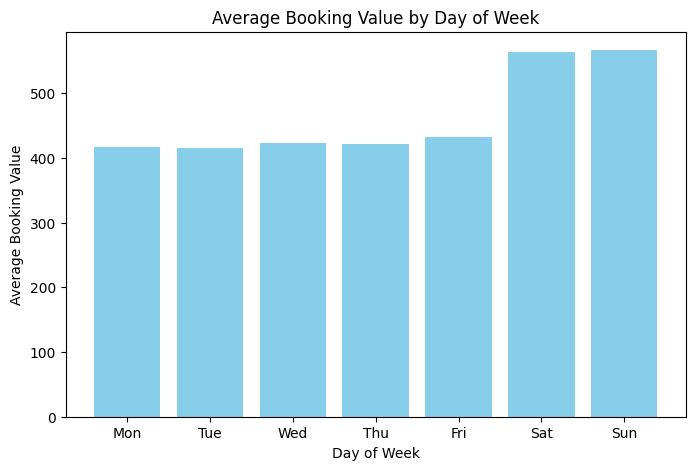

[415.9538145  415.79576376 423.19227231 421.79684966 431.34111034
 563.44141624 566.37080019]


In [5]:
# Extract day of week (0=Monday, 6=Sunday)
df['DayOfWeek'] = df['DateTime'].dt.dayofweek

# Map day numbers to names for better readability
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['DayName'] = df['DayOfWeek'].map(dict(enumerate(day_names)))

# Group by day and calculate mean booking value
weekday_booking_value = df.groupby('DayName')['Booking Value'].mean().reindex(day_names)

# Plot
plt.figure(figsize=(8,5))
plt.bar(weekday_booking_value.index, weekday_booking_value.values, color='skyblue')
plt.title('Average Booking Value by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Booking Value')
plt.show()
print(weekday_booking_value.values)

### What are the most active days of the week for bookings?

C:\Users\pablo\AppData\Local\Temp\ipykernel_29060\2258961099.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='Blues')


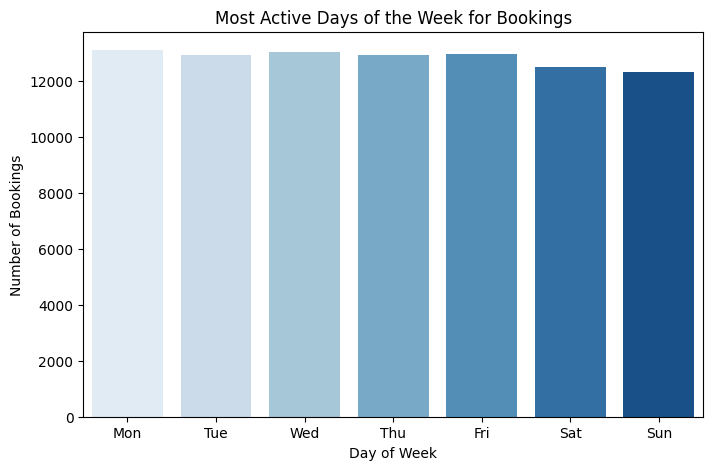

DayName
Mon    13121
Tue    12936
Wed    13044
Thu    12951
Fri    12987
Sat    12512
Sun    12322
Name: count, dtype: int64


In [12]:
# Extract day of week (0=Monday, 6=Sunday)
df['DayOfWeek'] = df['DateTime'].dt.dayofweek

# Map day numbers to names for better readability
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['DayName'] = df['DayOfWeek'].map(dict(enumerate(day_names)))

# Count number of bookings per day
day_counts = df['DayName'].value_counts().reindex(day_names)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='Blues')
plt.title('Most Active Days of the Week for Bookings')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bookings')
plt.show()

# Print the counts for each day
print(day_counts)

### Do longer vehicle arrival times lead to worse customer ratings?

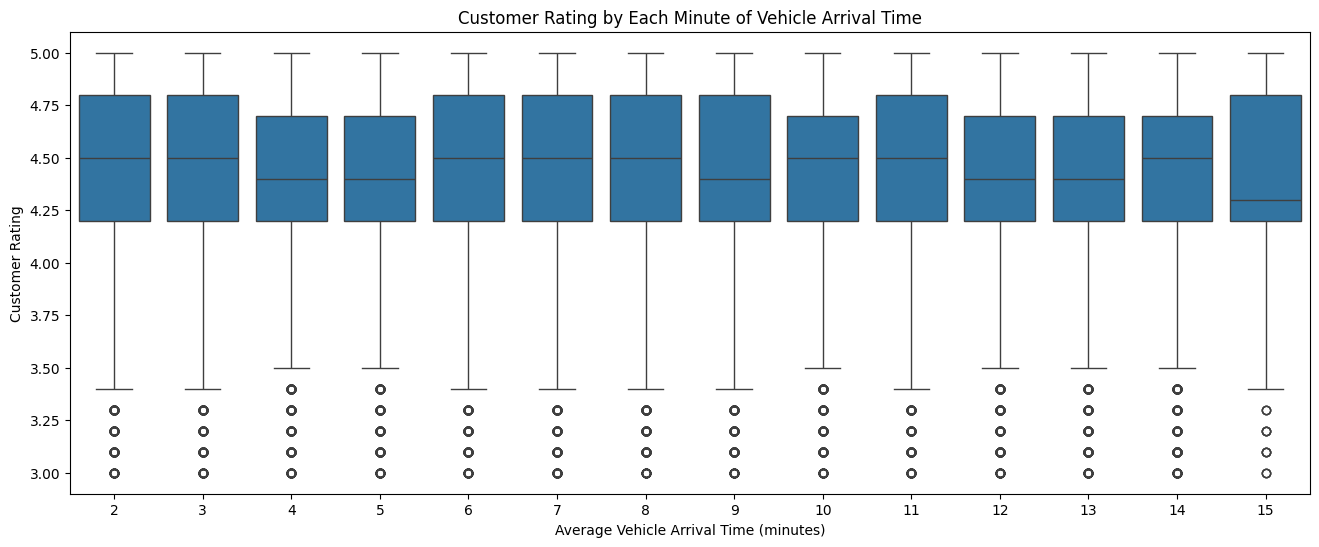

           count      mean       std  min  25%  50%  75%  max
Avg VTAT                                                     
2         6441.0  4.410480  0.432737  3.0  4.2  4.5  4.8  5.0
3         6885.0  4.411547  0.433456  3.0  4.2  4.5  4.8  5.0
4         6938.0  4.390819  0.449571  3.0  4.2  4.4  4.7  5.0
5         6967.0  4.403172  0.434640  3.0  4.2  4.4  4.7  5.0
6         6906.0  4.406632  0.438841  3.0  4.2  4.5  4.8  5.0
7         6894.0  4.408007  0.438341  3.0  4.2  4.5  4.8  5.0
8         6871.0  4.408165  0.436983  3.0  4.2  4.5  4.8  5.0
9         6968.0  4.402009  0.441469  3.0  4.2  4.4  4.8  5.0
10        6982.0  4.407577  0.434834  3.0  4.2  4.5  4.7  5.0
11        6919.0  4.408874  0.436105  3.0  4.2  4.5  4.8  5.0
12        6866.0  4.400641  0.437662  3.0  4.2  4.4  4.7  5.0
13        6889.0  4.392307  0.442657  3.0  4.2  4.4  4.7  5.0
14        7015.0  4.405830  0.436503  3.0  4.2  4.5  4.7  5.0
15         332.0  4.364458  0.463992  3.0  4.2  4.3  4.8  5.0
Correlat

In [6]:
# Ensure columns are numeric
df['Avg VTAT'] = pd.to_numeric(df['Avg VTAT'], errors='coerce')
df['Customer Rating'] = pd.to_numeric(df['Customer Rating'], errors='coerce')

# Drop rows with missing values in relevant columns
plot_df = df.dropna(subset=['Avg VTAT', 'Customer Rating'])

plt.figure(figsize=(16,6))
sns.boxplot(x=plot_df['Avg VTAT'].astype(int), y=plot_df['Customer Rating'])
plt.xlabel('Average Vehicle Arrival Time (minutes)')
plt.ylabel('Customer Rating')
plt.title('Customer Rating by Each Minute of Vehicle Arrival Time')
plt.show()

# Group by each minute of Avg VTAT and describe Customer Rating
minute_stats = plot_df.groupby(plot_df['Avg VTAT'].astype(int))['Customer Rating'].describe()
print(minute_stats)

# Check for correlation between avg VTAT and Customer Rating
corr = plot_df['Avg VTAT'].corr(plot_df['Customer Rating'])
print(f"Correlation between Avg VTAT and Customer Rating: {corr:.2f}")

### What months are the most active in terms of bookings?

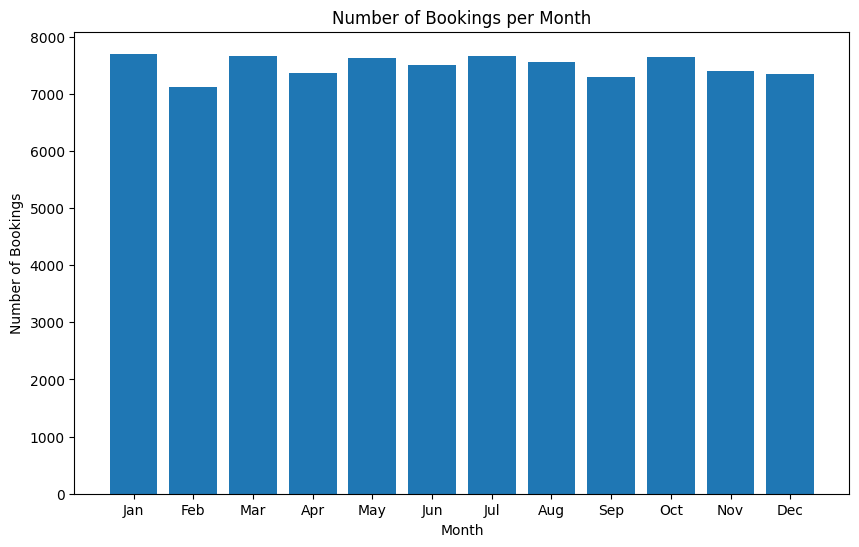

Month
1     7701
2     7124
3     7661
4     7356
5     7633
6     7499
7     7667
8     7550
9     7297
10    7646
11    7398
12    7341
Name: count, dtype: int64


In [7]:
# Extract month from DateTime
df['Month'] = df['DateTime'].dt.month

# Count number of bookings per month
monthly_counts = df['Month'].value_counts().sort_index()

# Month names for better readability
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot
plt.figure(figsize=(10,6))
plt.bar(month_names, monthly_counts)
plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()
print(monthly_counts)

### What are the most popular forms of transportation?

C:\Users\pablo\AppData\Local\Temp\ipykernel_29060\3423711414.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values, palette='viridis')


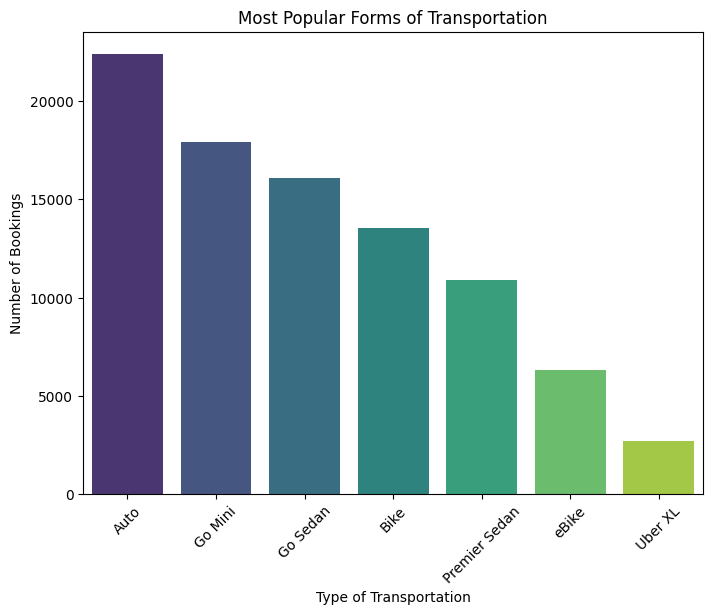

Vehicle Type
Auto             22411
Go Mini          17927
Go Sedan         16091
Bike             13535
Premier Sedan    10886
eBike             6333
Uber XL           2690
Name: count, dtype: int64


In [9]:
# Count the number of bookings for each vehicle type
vehicle_counts = df['Vehicle Type'].value_counts()

# Plot the most popular forms of transportation
plt.figure(figsize=(8,6))
sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values, palette='viridis')
plt.title('Most Popular Forms of Transportation')
plt.xlabel('Type of Transportation')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

# Print the counts for each type
print(vehicle_counts)

### What are the most popular forms of payment?

C:\Users\pablo\AppData\Local\Temp\ipykernel_29060\656089275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')


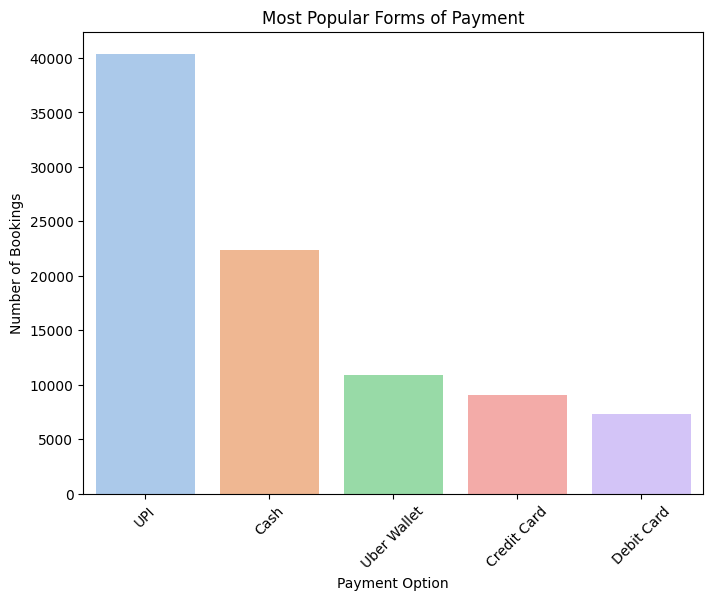

Payment Method
UPI            40385
Cash           22350
Uber Wallet    10853
Credit Card     9020
Debit Card      7265
Name: count, dtype: int64


In [11]:
# Count the number of bookings for each payment method
payment_counts = df['Payment Method'].value_counts()

# Plot the most popular forms of payment
plt.figure(figsize=(8,6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')
plt.title('Most Popular Forms of Payment')
plt.xlabel('Payment Option')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

# Print the counts for each payment option
print(payment_counts)

# **5. Insights & Conclusions**